# **Implementando Regressão Linear Simples do Zero**

Author: Arthur Felipe Thamay

Nessa tarefa você vai programar regressão linear simples do zero em python. Para isso, você deve assistir este [vídeo](https://www.youtube.com/watch?v=XdM6ER7zTLk) e seguir o passo-a-passo da implementação. Embora o código esteja disponível no github do autor vídeo, é importante que você digite o código enquanto assiste. Vários estudos já mostraram que aprendemos mais dessa forma do que somente assistindo. Teste o programa nos dados também fornecidos no [github do autor](https://github.com/llSourcell/linear_regression_live).

Feito isso, execute o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados [aqui](https://canvas.instructure.com/courses/2224020/files/105253142/download?wrap=1). Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

In [1]:
from numpy import *


def compute_error_for_line_given_points(b, m, points):   
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 


def step_gradiente(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y -((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y -((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_interations):
    b = starting_b
    m = starting_m
    for i in range(num_interations):
        b, m = step_gradiente(b, m, array(points), learning_rate)
    return [b,m]

  
def run():
    points = genfromtxt('income.csv', delimiter=',')    
    print(points) 
    learning_rate = 0.0001    
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000 
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()

[[10.         26.65883878]
 [10.40133779 27.30643535]
 [10.84280936 22.13241017]
 [11.24414716 21.1698405 ]
 [11.64548495 15.19263352]
 [12.08695652 26.39895104]
 [12.48829431 17.43530658]
 [12.88963211 25.50788523]
 [13.2909699  36.88459469]
 [13.73244147 39.66610875]
 [14.13377926 34.39628056]
 [14.53511706 41.49799354]
 [14.97658863 44.98157487]
 [15.37792642 47.03959526]
 [15.77926421 48.25257829]
 [16.22073579 57.03425134]
 [16.62207358 51.49091921]
 [17.02341137 61.33662055]
 [17.46488294 57.58198818]
 [17.86622074 68.55371402]
 [18.26755853 64.3109253 ]
 [18.7090301  68.95900864]
 [19.11036789 74.61463928]
 [19.51170569 71.8671953 ]
 [19.91304348 76.09813538]
 [20.35451505 75.77521803]
 [20.75585284 72.48605532]
 [21.15719064 77.35502057]
 [21.59866221 72.11879045]
 [22.         80.2605705 ]]
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


## **Questões**

### 1. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS (eixo y) por iteração (eixo x).

In [2]:
%matplotlib inline

def gradient_descent_runner_rss(points, starting_b, starting_m, learning_rate, num_interations):
    b = starting_b
    m = starting_m
    list_rss = []
    list_iteraction = []
    for i in range(num_interations): 
        b, m = step_gradiente(b, m, array(points), learning_rate)
        value_rss = compute_error_for_line_given_points(b, m, points)
        list_iteraction.append(i)
        list_rss.append(value_rss)    
        print("Iteração: "+ str(i) + " | " + "RSS: " + str(value_rss)) 

        plt.plot(list_iteraction, list_rss) 
        plt.scatter(list_iteraction, list_rss, c="r") 
        plt.title('Valor do RSS por Iteração')
        plt.xlabel('Iteração')
        plt.ylabel('RSS')
        plt.grid()

    return [b,m]

if __name__ == '__main__':
  run()

[[10.         26.65883878]
 [10.40133779 27.30643535]
 [10.84280936 22.13241017]
 [11.24414716 21.1698405 ]
 [11.64548495 15.19263352]
 [12.08695652 26.39895104]
 [12.48829431 17.43530658]
 [12.88963211 25.50788523]
 [13.2909699  36.88459469]
 [13.73244147 39.66610875]
 [14.13377926 34.39628056]
 [14.53511706 41.49799354]
 [14.97658863 44.98157487]
 [15.37792642 47.03959526]
 [15.77926421 48.25257829]
 [16.22073579 57.03425134]
 [16.62207358 51.49091921]
 [17.02341137 61.33662055]
 [17.46488294 57.58198818]
 [17.86622074 68.55371402]
 [18.26755853 64.3109253 ]
 [18.7090301  68.95900864]
 [19.11036789 74.61463928]
 [19.51170569 71.8671953 ]
 [19.91304348 76.09813538]
 [20.35451505 75.77521803]
 [20.75585284 72.48605532]
 [21.15719064 77.35502057]
 [21.59866221 72.11879045]
 [22.         80.2605705 ]]
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


### 2. Teste valores pequenos, médios e grandes de alpha (learning rate). O que acontece com o RSS durante as iterações em cada caso? Por que?

Foram testadas as taxas de aprendizagem 0.01, 0.001 e 0.0001, com taxa de RSS aumentando progressivamente com o aumento da taxa de aprendizagem. Para o valor de 0.001, o codigo atingiu o passo de maior tamanho para o gradiente, conferindo uma convergência mais rápida para um valor proximo ao limite. O modelo com a taxa de aprendizado de 0.001 atinge um RSS de 91.82 após 1000 iterações. A taxa de 0.0001 atinge um RSS de 103.39 após as 1000 iterações. Já a taxa de 0.01 não foi significativo para a amostra de aprendizagem.

In [3]:
def run():    
    points = genfromtxt('income.csv', delimiter=',')
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000 
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
  run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -3.403476317589064, m = 3.4539297809959373, error = 91.82255408075055


### 3. Teste valores diferentes do número de iterações e alpha até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

Número de iterações: 15724 e Learning Rate: 0.003

In [4]:
def run():
    points = genfromtxt('income.csv', delimiter=',')
    learning_rate = 0.003
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 15724                                   
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
  run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 15724 iterations b = -39.00012177355754, m = 5.57292537447843, error = 29.83831445038784


### 4. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado à norma do gradiente (como no algoritmo dos slides apresentados em sala). 

O critério de tolerância definido como valor limite foi 0.001.

A saída de streaming foi truncada nas últimas 5000 linhas.
Erro: 29.82882465360141
Iteração:84103Norma gradiente = 0.001268130397442277
Erro: 29.82882465199333
Iteração:84104Norma gradiente = 0.0012680097914387436
Erro: 29.82882465038557
Iteração:84105Norma gradiente = 0.001267889196906428
Erro: 29.82882464877811
Iteração:84106Norma gradiente = 0.001267768613842474
Erro: 29.828824647170947
Iteração:84107Norma gradiente = 0.0012676480422459842
Erro: 29.828824645564097
Iteração:84108Norma gradiente = 0.0012675274821177611
Erro: 29.82882464395753
Iteração:84109Norma gradiente = 0.0012674069334558124
Erro: 29.82882464235129
Iteração:84110Norma gradiente = 0.0012672863962592928
Erro: 29.828824640745374
Iteração:84111Norma gradiente = 0.001267165870524251
Erro: 29.828824639139725
Iteração:84112Norma gradiente = 0.0012670453562536464
Erro: 29.828824637534403
Iteração:84113Norma gradiente = 0.0012669248534434914
Erro: 29.828824635929376
Iteração:84114Norma gradiente = 0.0012668043620954741
Err

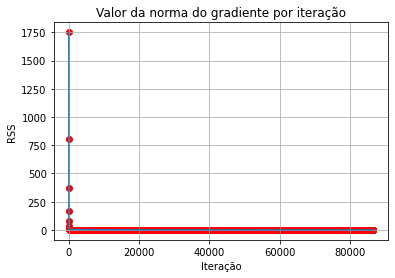

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
list_py = [10, 2, 3]


vetor_np = np.array([1, 20, 3])

print(LA.norm(vetor_np))

x = np.array([2, 1, 1]) - np.array([1, 0, 1])
print(x)
print(LA.norm(x))

def calcula_norma1(vetor): 
  vetor = np.array(vetor) 
  norma = LA.norm(vetor) 
  return norma

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 

def step_gradiente(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1] 
        b_gradient += -(2/N) * (y -((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y -((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    normaGradiente = sqrt(b_gradient**2+m_gradient**2)
    return [new_b, new_m, normaGradiente]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_interations, limiar):
    b = starting_b
    m = starting_m
    it = []
    gr = []
    i = 0
    while(True):
        b, m, normaGradiente = step_gradiente(b, m, array(points), learning_rate)
        print("Iteração:" + str(i) + "Norma gradiente = " + str(normaGradiente))
        erro = compute_error_for_line_given_points(b, m, points)
        print("Erro: "+ str(erro))
       
        it.append(i)
        gr.append(normaGradiente)
        i = i+1
        if(normaGradiente < limiar):
          break   
    plt.plot(it, gr)  
    plt.scatter(it, gr, c='r') 
    plt.title('Valor da norma do gradiente por iteração')
    plt.xlabel('Iteração')
    plt.ylabel('RSS')
    plt.grid()
    return [b,m]
  
def run():
    points = genfromtxt('income.csv', delimiter=',')    
    learning_rate = 0.001  
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 0 
    limiar = 0.001
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, limiar)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()

### 5. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

O valor de tolerância é de 0.04.

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteração:46567Norma gradiente = 0.04504168507106221
Erro: 29.8394799903955
Iteração: 46567 | RSS: 29.8394799903955
After 46567 iterations b = -38.9735407964626, m = 5.571343063206872, rss = 29.8394799903955
Iteração:46568Norma gradiente = 0.045037401365211324
Erro: 29.839477962124434
Iteração: 46568 | RSS: 29.839477962124434
After 46568 iterations b = -38.97358575427865, m = 5.57134573945383, rss = 29.839477962124434
Iteração:46569Norma gradiente = 0.045033118066764015
Erro: 29.83947593423914
Iteração: 46569 | RSS: 29.83947593423914
After 46569 iterations b = -38.97363070781897, m = 5.571348415446262, rss = 29.83947593423914
Iteração:46570Norma gradiente = 0.04502883517568292
Erro: 29.839473906739556
Iteração: 46570 | RSS: 29.839473906739556
After 46570 iterations b = -38.973675657083966, m = 5.571351091184193, rss = 29.839473906739556
Iteração:46571Norma gradiente = 0.04502455269192627
Erro: 29.839471879625606
Iteração: 46571 

No handles with labels found to put in legend.


After 0 iterations b = -39.02648863257452, m = 5.5744949397381705, error = 29.837224921199752


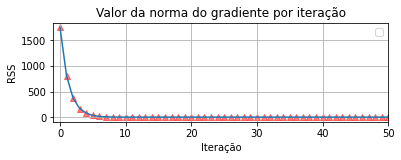

In [6]:
import matplotlib.pyplot as plt

def calcula_norma1(vetor): 
  vetor = np.array(vetor) 
  norma = LA.norm(vetor) 
  return norma


def compute_error_for_line_given_points_item6(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 

def step_gradiente_item6(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]    
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))     
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    normaGradiente = sqrt(b_gradient**2 + m_gradient**2)
    return [new_b, new_m, normaGradiente]

def gradient_descent_runner_item6(points, starting_b, starting_m, learning_rate, num_interations, limiar):
    b = starting_b
    m = starting_m
    it = []
    gr = []
    i = 0

    while(True):
        b, m, normaGradiente = step_gradiente_item6(b, m, array(points), learning_rate)
        print("Iteração:" + str(i) + "Norma gradiente = " + str(normaGradiente))
        erro = compute_error_for_line_given_points_item6(b, m, points)
        print("Erro: "+ str(erro))
        value_rss = compute_error_for_line_given_points_item6(b, m, points)
        print("Iteração: " + str(i) +" | " + "RSS: " + str(value_rss))
        print ("After {0} iterations b = {1}, m = {2}, rss = {3}".format(i, b, m, value_rss))
        it.append(i)
        gr.append(normaGradiente)
        i = i+1
        if(normaGradiente < limiar):
          break
          
    plt.subplot(2, 1, 1)
    plt.plot(it, gr)  
    plt.scatter(it, gr, c='r', alpha = 0.5, marker='^') 
    plt.title('Valor da norma do gradiente por iteração')
    plt.xlabel('Iteração')
    plt.ylabel('RSS')
    plt.grid()
    plt.legend()
    plt.xlim([-1, 50])
    return [b,m]

def run_item6():
    points = genfromtxt('income.csv', delimiter=',')   
    learning_rate = 0.001  
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 0 
    limiar = 0.04
    
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points_item6(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner_item6(points, initial_b, initial_m, learning_rate, num_iterations, limiar)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points_item6(b, m, points)))

if __name__ == '__main__':
  run_item6()

### 6. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

A diferença entre o tempo de processamento do método com valor de tolerância percorrrendo o gradiente descendente é consideravelmente maior e mais significativo que o método baseado em encontrar raizes das derivadas parciais do RSS. O valor de tolerância obtido foi de 42159.18588638306ms. Equações Normais foi de 19.964933395385742ms

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteração:46567Norma gradiente = 0.04504168507106221
Erro: 29.8394799903955
Iteração: 46567 | RSS: 29.8394799903955
After 46567 iterations b = -38.9735407964626, m = 5.571343063206872, rss = 29.8394799903955
Iteração:46568Norma gradiente = 0.045037401365211324
Erro: 29.839477962124434
Iteração: 46568 | RSS: 29.839477962124434
After 46568 iterations b = -38.97358575427865, m = 5.57134573945383, rss = 29.839477962124434
Iteração:46569Norma gradiente = 0.045033118066764015
Erro: 29.83947593423914
Iteração: 46569 | RSS: 29.83947593423914
After 46569 iterations b = -38.97363070781897, m = 5.571348415446262, rss = 29.83947593423914
Iteração:46570Norma gradiente = 0.04502883517568292
Erro: 29.839473906739556
Iteração: 46570 | RSS: 29.839473906739556
After 46570 iterations b = -38.973675657083966, m = 5.571351091184193, rss = 29.839473906739556
Iteração:46571Norma gradiente = 0.04502455269192627
Erro: 29.839471879625606
Iteração: 46571 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


After 0 iterations b = -39.02648863257452, m = 5.5744949397381705, error = 29.837224921199752
Valor de Tolerância: 34213.91773223877ms
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
w0 = -39.44625667909617
w1 = 5.599482874119919
After 1 iterations b = -39.44625667909617, m = 5.599482874119919, error = 29.82881619900623
Equações Normais: 30.336856842041016ms


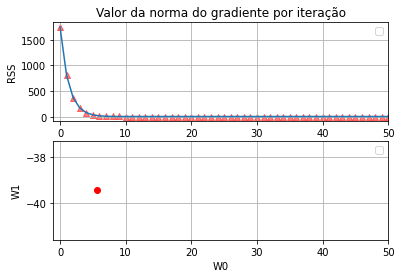

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd

a = np.array([[40, 10], [50, 11]])
print(a.mean(axis=1) )
print(a.mean(axis=0))  

def compute_error_for_line_given_points(b, m, points): 
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 
  
def media_pontos(pontos):
    a = np.array(pontos)
    return (a.mean(axis=0))

def calc_gradiente(points, w0, w1, learningRate):
    medias = media_pontos(points)
    media_x = medias[0]
    media_y = medias[1]    
    w1_num = 0
    w1_denom = 0
    x = 0
    y = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        w1_num += (x - media_x)*(y - media_y)
        w1_denom += (x - media_x)**2
    w1 = w1_num / w1_denom
    w0 = media_y - w1*media_x
    print("w0 = "+str(w0))
    print("w1 = "+str(w1))    
    plt.subplot(2, 1, 2)
    plt.scatter(w1, w0, color='red') 
    plt.xlabel('W0')
    plt.ylabel('W1')
    plt.grid()
    plt.legend()
    plt.xlim([-1,50])    
    return [w0, w1]
  
def run(): 
  points = genfromtxt('income.csv', delimiter=',')
  learning_rate = 0.001
  initial_b = 0 # initial y-intercept guess
  initial_m = 0 # initial slope guess
  num_iterations = 1
  print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
  print ("Running...")
  [b, m] = calc_gradiente(points, initial_b, initial_m, learning_rate)
  print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
  
if __name__ == '__main__':
  tic = time.time()
  run_item6()
  toc = time.time()
  print("Valor de Tolerância: " + str(1000*(toc - tic)) + "ms")
  
  tic = time.time()
  run()
  toc = time.time()  
  print("Equações Normais: " + str(1000*(toc - tic)) + "ms")